<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

## Цель

Для интернет-магазина "Викишоп" подготовить модель фильтрации комментариев и описания товаров<br>
Модель должна классифицировать тексты определяя эмоциональный окрас позитивный или негативный <br>
<br>
Критерий оценки качества модели метрика F1, допустимые минимальные значения 0.75<br>
Данные находятся по ссылке https://code.s3.yandex.net/datasets/toxic_comments.csv<br>
В файле два столбца `text и toxic` <br>
Признаки находятся в столбце `text`<br>
Целевой признак `toxic`<br>

## Подготовка

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from plotly.subplots import make_subplots

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import keras
import torch
import transformers
from tqdm import notebook
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertConfig
from transformers import BertModel

In [3]:
pip install detoxify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 43.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 56.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.2
    Uninstalling tokenizers-0.13.2:
      Successfully uninstalled tokenizers-0.13.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.3
    Uninstalling transformers-4.27.3:
      Successfully uninstalled transformers-4.27.3
Note: you may need to restart the kernel to use updated packages.


In [4]:
# pip install --upgrade transformers


In [5]:
pip install --upgrade --force-reinstall nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.1/757.1 kB 48.4 MB/s eta 0:00:00
  Attempting uninstall: zipp
    Found existing installation: zipp 3.11.0
    Uninstalling zipp-3.11.0:
      Successfully uninstalled zipp-3.11.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1
  Attempting uninstall: regex
    Found existing installation: regex 2021.11.10
    Uninstalling re

In [6]:
from detoxify import Detoxify
from transformers import BertConfig, BertForSequenceClassification, BertTokenizer
import os

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer   
from nltk.corpus import wordnet

In [7]:

# nltk.data.path.append('/path/to/nltk_data/')
# nltk.download('wordnet', quiet=True)

In [8]:
# Загрузка стоп-слов
nltk.download()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet', quiet=True)

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  l



Packages:
  [*] abc................. Australian Broadcasting Commission 2006
  [*] alpino.............. Alpino Dutch Treebank
  [*] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [*] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [*] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [*] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [*] book_grammars....... Grammars from NLTK Book
  [*] brown............... Brown Corpus
  [*] brown_tei........... Brown Corpus (TEI XML Version)
  [*] cess_cat............ CESS-CAT Treebank
  [*] cess_esp............ CESS-ESP Treebank
  [*] chat80.............. Chat-80 Data Files
  [*] city_database....... City Database
  [*] cmudict............. The Carnegie Mellon Pronouncing Dictionary (0.6)
  [ ] comparative_sentences Comparative Sentence Dataset
  

Hit Enter to continue:  


  [*] conll2002........... CONLL 2002 Named Entity Recognition Corpus
  [*] conll2007........... Dependency Treebanks from CoNLL 2007 (Catalan
                           and Basque Subset)
  [*] crubadan............ Crubadan Corpus
  [*] dependency_treebank. Dependency Parsed Treebank
  [ ] dolch............... Dolch Word List
  [*] europarl_raw........ Sample European Parliament Proceedings Parallel
                           Corpus
  [ ] extended_omw........ Extended Open Multilingual WordNet
  [*] floresta............ Portuguese Treebank
  [ ] framenet_v15........ FrameNet 1.5
  [ ] framenet_v17........ FrameNet 1.7
  [*] gazetteers.......... Gazeteer Lists
  [*] genesis............. Genesis Corpus
  [*] gutenberg........... Project Gutenberg Selections
  [*] ieer................ NIST IE-ER DATA SAMPLE
  [*] inaugural........... C-Span Inaugural Address Corpus
  [*] indian.............. Indian Language POS-Tagged Corpus
  [*] jeita............... JEITA Public Morphologically Tagged 

Hit Enter to continue:  


  [*] knbc................ KNB Corpus (Annotated blog corpus)
  [*] large_grammars...... Large context-free and feature-based grammars
                           for parser comparison
  [*] lin_thesaurus....... Lin's Dependency Thesaurus
  [*] mac_morpho.......... MAC-MORPHO: Brazilian Portuguese news text with
                           part-of-speech tags
  [*] machado............. Machado de Assis -- Obra Completa
  [*] masc_tagged......... MASC Tagged Corpus
  [*] maxent_ne_chunker... ACE Named Entity Chunker (Maximum entropy)
  [*] maxent_treebank_pos_tagger Treebank Part of Speech Tagger (Maximum entropy)
  [*] moses_sample........ Moses Sample Models
  [*] movie_reviews....... Sentiment Polarity Dataset Version 2.0
  [*] mte_teip5........... MULTEXT-East 1984 annotated corpus 4.0
  [ ] mwa_ppdb............ The monolingual word aligner (Sultan et al.
                           2015) subset of the Paraphrase Database.
  [*] names............... Names Corpus, Version 1.3 (1994-03-2

Hit Enter to continue:  


  [*] opinion_lexicon..... Opinion Lexicon
  [ ] panlex_swadesh...... PanLex Swadesh Corpora
  [*] paradigms........... Paradigm Corpus
  [ ] pe08................ Cross-Framework and Cross-Domain Parser
                           Evaluation Shared Task
  [ ] perluniprops........ perluniprops: Index of Unicode Version 7.0.0
                           character properties in Perl
  [*] pil................. The Patient Information Leaflet (PIL) Corpus
  [*] pl196x.............. Polish language of the XX century sixties
  [*] porter_test......... Porter Stemmer Test Files
  [*] ppattach............ Prepositional Phrase Attachment Corpus
  [*] problem_reports..... Problem Report Corpus
  [*] product_reviews_1... Product Reviews (5 Products)
  [*] product_reviews_2... Product Reviews (9 Products)
  [*] propbank............ Proposition Bank Corpus 1.0
  [*] pros_cons........... Pros and Cons
  [*] ptb................. Penn Treebank
  [*] punkt............... Punkt Tokenizer Models
  [*] qc...

Hit Enter to continue:  


  [*] rslp................ RSLP Stemmer (Removedor de Sufixos da Lingua
                           Portuguesa)
  [*] rte................. PASCAL RTE Challenges 1, 2, and 3
  [*] sample_grammars..... Sample Grammars
  [*] semcor.............. SemCor 3.0
  [*] senseval............ SENSEVAL 2 Corpus: Sense Tagged Text
  [*] sentence_polarity... Sentence Polarity Dataset v1.0
  [*] sentiwordnet........ SentiWordNet
  [*] shakespeare......... Shakespeare XML Corpus Sample
  [*] sinica_treebank..... Sinica Treebank Corpus Sample
  [*] smultron............ SMULTRON Corpus Sample
  [*] snowball_data....... Snowball Data
  [*] spanish_grammars.... Grammars for Spanish
  [*] state_union......... C-Span State of the Union Address Corpus
  [*] stopwords........... Stopwords Corpus
  [*] subjectivity........ Subjectivity Dataset v1.0
  [*] swadesh............. Swadesh Wordlists
  [*] switchboard......... Switchboard Corpus Sample
  [*] tagsets............. Help on Tagsets
  [*] timit...............

Hit Enter to continue:  


  [*] treebank............ Penn Treebank Sample
  [*] twitter_samples..... Twitter Samples
  [*] udhr2............... Universal Declaration of Human Rights Corpus
                           (Unicode Version)
  [*] udhr................ Universal Declaration of Human Rights Corpus
  [*] unicode_samples..... Unicode Samples
  [*] universal_tagset.... Mappings to the Universal Part-of-Speech Tagset
  [*] universal_treebanks_v20 Universal Treebanks Version 2.0
  [*] vader_lexicon....... VADER Sentiment Lexicon
  [ ] verbnet3............ VerbNet Lexicon, Version 3.3
  [*] verbnet............. VerbNet Lexicon, Version 2.1
  [*] webtext............. Web Text Corpus
  [ ] wmt15_eval.......... Evaluation data from WMT15
  [*] word2vec_sample..... Word2Vec Sample
  [ ] wordnet2021......... Open English Wordnet 2021
  [ ] wordnet2022......... Open English Wordnet 2022
  [ ] wordnet31........... Wordnet 3.1
  [*] wordnet............. WordNet
  [*] wordnet_ic.......... WordNet-InfoContent
  [*] word

Hit Enter to continue:  d wordnet2021



Collections:
  [P] all-corpora......... All the corpora
  [P] all-nltk............ All packages available on nltk_data gh-pages
                           branch
  [P] all................. All packages
  [P] book................ Everything used in the NLTK Book
  [P] popular............. Popular packages
  [P] tests............... Packages for running tests
  [ ] third-party......... Third-party data packages

([*] marks installed packages; [P] marks partially installed collections)

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d all-corpora


       | 
       | Downloading package abc to /usr/share/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /usr/share/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package bcp47 to /usr/share/nltk_data...
       | Downloading package biocreative_ppi to
       |     /usr/share/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /usr/share/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /usr/share/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /usr/share/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Downloading package cess_esp to /usr/share/nltk_data...
       |   Package cess_esp is already up-to-date!
       | Downloading package chat80 to /usr/share/nltk_data...
       |   Package chat80 is already up-to-d


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
from catboost import Pool, CatBoostRegressor

from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold

In [10]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bigquery_stats  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %sql  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %wandb  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%la

In [11]:
try:
    import langdetect
    
except:
    %pip install langdetect
    import langdetect
from langdetect import detect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=9bf90616c9bb7c35876b5857a894551b942c0de97087af76a2d6e4d526063932
  Stored in directory: /root/.cache/pip/wheels/73/b2/db/0c9b9eb7a44bf85ec0b42c06ee617d0a0de66840dc0b3248d1
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [12]:
try:
    import optuna
except:
    %pip install optuna
    import optuna
    from optuna.integration import LightGBMPruningCallback

In [13]:
try:
    data = pd.read_csv('toxic_comments.csv')

except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')


In [14]:
data = data.sample(n=20000)
data.shape

(20000, 3)

In [15]:
# зададим константы
NAME_DATA = 'taxi.csv'
RANDOM_STATE = 6568

In [16]:
def isna_count_procent(data, name):
    '''
    Создадим таблицу с пропусками в  дата сете
    Всего три столбца 
    1. процентное отношение пропусков к длине
    2. количество пропусков в единицах
    3. тип
    Далее блок выводит всю доступную информацию о данных 
    Несколько первых строк
    Описание числовых признаков
    Описание категориальных признаков
    
    '''
    pd.set_option('display.max_rows', None)
    isna_columns = data.isna().sum() > 0
    type_ = pd.DataFrame(data[data.isna().sum()[isna_columns].index.tolist()].dtypes)[0]
    isna_columns = pd.DataFrame([data.isna().sum()[isna_columns]/data.shape[0], data.isna().sum()[isna_columns]]).T
    isna_columns = isna_columns.rename(columns={0: 'procent', 1: 'count'})
    # isna_columns['type'] = type_[0]
    isna_columns['count'] = isna_columns['count'].map('{:,.2f}'.format)
    isna_columns['procent'] = isna_columns['procent'].map('{:,.2%}'.format)
    isna_columns = isna_columns.sort_values('procent', ascending=False)
    # блок показывае всё о данных
    display(data.head())
    print('#'*55)
    print()
    display(data.describe(include=np.number))
    print()
    display(data.describe(include=np.object_))
    print('#'*55)
    print()
    data.info()
    print('#'*55)
    isna = data.isna().sum().sum()
    isna_procent = len(isna_columns)/data.shape[1]
    s = data.duplicated().sum()
    print(f'Количество дубликатов в данных  равно {s}')
    print()
    print(f'Всего пропусков в {name} {isna:,} шт. в {len(isna_columns)} столбцах')
    print(f'В процентном отношении {isna_procent:.2%} от {data.shape[1]:,} признаков')
  
    print()
    display(isna_columns)
    return isna_columns

In [17]:
isna_count_procent(data, NAME_DATA)

,Unnamed: 0,text,toxic
65770,65837,New C&C; template dispute \n\nSeems there is a...,0
103689,103786,"SkepticalRaptor, Wikipedia Editor and Administ...",0
10399,10412,Defending the 1905 French Law of Separation of...,0
131860,131996,YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK Y...,1
36312,36354,"""\n\n I've seen usage to suggest that a demons...",0


#######################################################



,Unnamed: 0,toxic
count,20000.00000,20000.000000
mean,79898.72265,0.101200
std,46355.51394,0.301601
min,8.00000,0.000000
25%,39492.75000,0.000000
50%,79806.50000,0.000000
75%,120484.50000,0.000000
max,159430.00000,1.000000


,text
count,20000
unique,20000
top,New C&C; template dispute \n\nSeems there is a...
freq,1


#######################################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 65770 to 84273
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20000 non-null  int64 
 1   text        20000 non-null  object
 2   toxic       20000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 625.0+ KB
#######################################################
Количество дубликатов в данных  равно 0

Всего пропусков в taxi.csv 0 шт. в 0 столбцах
В процентном отношении 0.00% от 3 признаков



,procent,count


,procent,count


В данных два столбца которые мы ожидали увидеть и <br>
Третий столбец о которм заказчик нас не предупредил<br>
Проверим является ли столбец `Unnamed: 0` индексом

In [18]:
column_array = np.array(data['Unnamed: 0'])

# Вычисление разностей между элементами массива
diff_array = np.diff(column_array)

# Проверка на непрерывность
if np.all(diff_array == 1):
    print("Столбец является непрерывным.")
else:
    print("Столбец не является непрерывным.")

Столбец не является непрерывным.


Информация в столбце `Unnamed: 0` не понятна ценности для выполнения задания не составляет<br>
Удалим этот столбец

In [19]:
data = data.drop(columns='Unnamed: 0', axis=1)

Построим график столбца `toxic` посмотрим на распределение

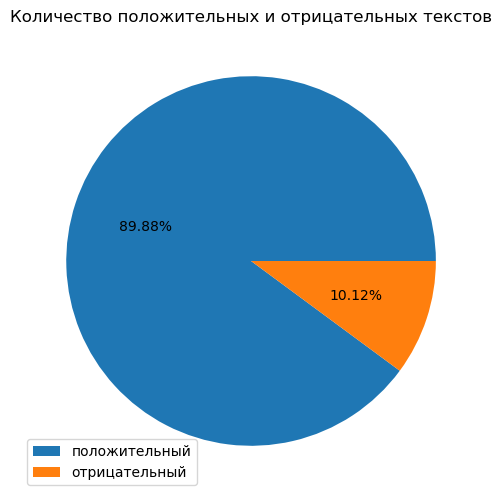

In [20]:
fig, (ax1) = plt.subplots( figsize=(8,6));

data['toxic'].value_counts().plot.pie( labels=None, ylabel='', autopct='%1.2f%%', legend=True, ax=ax1);
ax1.legend(['положительный', 'отрицательный'],loc='lower left');
ax1.set_title('Количество положительных и отрицательных текстов');

Целевой признак имеет большую диспропорцию, при разбиении на обучающую и проверочную выборки обязательно <br>
Выполнить балансировку классов

In [37]:
%%time
# Инициализация лемматизатора и токенайзера

lemmatizer = WordNetLemmatizer()
tokenizer = BertTokenizer.from_pretrained('unitary/toxic-bert')


# Токенизация и лемматизация каждого текста
# data['processed_text'] = data['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x.lower()) if word.isalpha()]))

# input_ids = [tokenizer.encode(text, add_special_tokens=True) for text in data['processed_text']]
# input_ids = data['processed_text'].map(lambda text: tokenizer.encode(text, add_special_tokens=True))

data['processed_textrr'] = data['text'].map(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.isalnum()]))
input_ids = data['processed_textrr'].map(lambda text: tokenizer.encode(text, add_special_tokens=True))

Token indices sequence length is longer than the specified maximum sequence length for this model (682 > 512). Running this sequence through the model will result in indexing errors


CPU times: user 51.8 s, sys: 73.6 ms, total: 51.9 s
Wall time: 52.2 s


In [38]:
%%time

maxlen = max(len(x) for x in input_ids)
padded_input = pad_sequences(input_ids, maxlen=maxlen, padding='post', truncating='post')
output_array =torch.LongTensor(padded_input)

CPU times: user 236 ms, sys: 375 ms, total: 611 ms
Wall time: 615 ms


In [39]:
output_array.size()

torch.Size([20000, 2275])

In [40]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device being used: {device}")

# Делим исходный тензор на батчи по 5
batch_size = 200
input_batches = torch.chunk(output_array, output_array.size()[0] // batch_size)

# Создаем модель и переносим её на нужный device
model = torch.hub.load('unitaryai/detoxify','toxic_bert').to(device)

# Обрабатываем каждый батч
output_batches = []
with torch.no_grad(), tqdm(total=len(output_array)) as progress_bar:
    for batch in input_batches:
        batch = batch.view(batch_size, -1)[:,:512].to(device)
        # Применяем модель к батчу
        output = model(batch)
        # Сохраняем результаты модели
        output_batches.append(output.logits.to("cpu"))
        progress_bar.update(batch_size)

# Собираем результаты в исходный тензор
output_tensor = torch.cat(output_batches, dim=0)

Device being used: cuda


Using cache found in /root/.cache/torch/hub/unitaryai_detoxify_master
100%|██████████| 20000/20000 [11:58<00:00, 27.84it/s]


In [41]:
output_tensor.size()
numpy_array = output_tensor.numpy()

# # создаем датафрейм из numpy массива
features = pd.DataFrame(data=numpy_array)
data = data.reset_index(drop=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, data['toxic'], test_size=0.3, stratify=data['toxic'])



### LogisticRegression

In [43]:

def objective(trial):
  
    # Определение гиперпараметров, которые нужно подобрать
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform('C', 1e-5, 100)

    # Создание модели с заданными гиперпараметрами
    clf = LogisticRegression(penalty=penalty, C=C, solver='liblinear', max_iter=10000)

    # Кросс-валидация модели с использованием метрики f1_score
    kf = KFold(n_splits=2, shuffle=True, random_state=12)
    scores = []
    for train_idx, val_idx in kf.split(X_train):
        X_tra, y_tra = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        scores.append(f1_score(y_val, y_pred))

    # Оптимизация целевой метрики (f1_score)
    return np.mean(scores)

# Создание объекта Optuna и запуск оптимизации

LR_study = optuna.create_study(direction='maximize')
LR_study.optimize(objective, n_trials=20, show_progress_bar=False)

# Получение лучших параметров и модели
LR_best_params = LR_study.best_params
LR_best_model = LogisticRegression(penalty=LR_best_params['penalty'], C=LR_best_params['C'], solver='liblinear', max_iter=10000)
LR_best_score = LR_study.best_value

[I 2023-04-05 00:15:04,727] A new study created in memory with name: no-name-b81beac4-88eb-4241-9c53-503a30a75dcc
[I 2023-04-05 00:15:04,787] Trial 0 finished with value: 0.02685002008061997 and parameters: {'penalty': 'l1', 'C': 2.3633403170188155e-05}. Best is trial 0 with value: 0.02685002008061997.
[I 2023-04-05 00:15:04,878] Trial 1 finished with value: 0.35006250097252545 and parameters: {'penalty': 'l1', 'C': 0.0002101151723749519}. Best is trial 1 with value: 0.35006250097252545.
[I 2023-04-05 00:15:04,945] Trial 2 finished with value: 0.02685002008061997 and parameters: {'penalty': 'l1', 'C': 2.6565255767730075e-05}. Best is trial 1 with value: 0.35006250097252545.
[I 2023-04-05 00:15:05,085] Trial 3 finished with value: 0.7377509415840777 and parameters: {'penalty': 'l2', 'C': 0.015504929021133713}. Best is trial 3 with value: 0.7377509415840777.
[I 2023-04-05 00:15:05,197] Trial 4 finished with value: 0.482445082979051 and parameters: {'penalty': 'l2', 'C': 0.000196451142411

In [44]:
LR_best_score

0.76701646567718

In [45]:
LR_best_model.fit(X_train, y_train)

pred = LR_best_model.predict(X_test)
LR_f1 = f1_score(y_test, pred)
LR_f1

0.7544581618655694

### CatBoostClassifier

In [46]:
import catboost as cb

def objective(trial):
  
    # Определение гиперпараметров, которые нужно подобрать
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.5)
    depth = trial.suggest_int('depth', 4, 10)
    l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1e-5, 10)

    # Создание модели с заданными гиперпараметрами
    Cat = cb.CatBoostClassifier(
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        iterations=1000,
        random_state=12,
        verbose=False,
#         task_type="GPU"
    )

    # Кросс-валидация модели с использованием метрики f1_score
    kf = KFold(n_splits=2, shuffle=True, random_state=12)
    scores = []
    for train_idx, val_idx in kf.split(X_train):
        X_tra, y_tra = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]
        # print(y_train)
        Cat.fit(X_tra, y_tra, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)
        y_pred = Cat.predict(X_val)
        scores.append(f1_score(y_val, y_pred))
    
    # Оптимизация целевой метрики (f1_score)
    return np.mean(scores)

# Создание объекта Optuna и запуск оптимизации

Cat_study = optuna.create_study(direction='maximize')
Cat_study.optimize(objective, n_trials=10, show_progress_bar=True)

# Получение лучших параметров и модели
Cat_best_params = Cat_study.best_params
Cat_best_model = cb.CatBoostClassifier(**Cat_best_params) # task_type="GPU"
Cat_best_score = Cat_study.best_value

[I 2023-04-05 00:15:25,274] A new study created in memory with name: no-name-7052994d-5434-4349-b7d2-9e1305775db4
/opt/conda/lib/python3.7/site-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2023-04-05 00:15:29,255] Trial 0 finished with value: 0.7933010828541465 and parameters: {'learning_rate': 0.034791275572369405, 'depth': 7, 'l2_leaf_reg': 2.1519384465145626}. Best is trial 0 with value: 0.7933010828541465.
[I 2023-04-05 00:15:30,674] Trial 1 finished with value: 0.7908408674281597 and parameters: {'learning_rate': 0.13562495566590116, 'depth': 6, 'l2_leaf_reg': 6.4052241005651345}. Best is trial 0 with value: 0.7933010828541465.
[I 2023-04-05 00:15:33,539] Trial 2 finished with value: 0.7919436168734059 and parameters: {'learning_rate': 0.02198380295734362, 'depth': 6, 'l2_leaf_reg': 0.10353290442953096}. Best is trial 0 with value: 0.7933010828541465.
[I 2023-04-05 00:15:39,552] Trial 3 finished with value: 0.791363201586504 and parameters: {'learning_rate': 0.02417209932174861, 'depth': 9, 'l2_leaf_reg': 0.4852628648889441}. Best is trial 0 with value: 0.7933010828541465.
[I 2023-04-05 00:15:42,978] Trial 4 finished with value: 0.7902427955142468 and parameters:

In [47]:
Cat_best_score

0.7933010828541465

In [48]:
Cat_best_model.fit(X_train, y_train, verbose=False)

Cat_pred = Cat_best_model.predict(X_test)
Cat_f1 = f1_score(y_test, Cat_pred)
Cat_f1

0.7750325097529259

### XGBClassifier

In [49]:
import xgboost as xgb

def objective(trial):
  
    # Определение гиперпараметров, которые нужно подобрать
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.5)
    max_depth = trial.suggest_int('max_depth', 4, 10)
    alpha = trial.suggest_loguniform('alpha', 1e-5, 10)

    # Создание модели с заданными гиперпараметрами
    xgb_model = xgb.XGBClassifier(
        learning_rate=learning_rate,
        max_depth=max_depth,
        alpha=alpha,
        n_estimators=1000,
        random_state=12,
        verbosity=0,
        tree_method="gpu_hist",
        gpu_id=0
    )

    # Кросс-валидация модели с использованием метрики f1_score
    kf = KFold(n_splits=2, shuffle=True, random_state=12)
    scores = []
    for train_idx, val_idx in kf.split(X_train):
        X_tra, y_tra = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]
        xgb_model.fit(X_tra, y_tra, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)
        y_pred = xgb_model.predict(X_val)
        scores.append(f1_score(y_val, y_pred))
    
    # Оптимизация целевой метрики (f1_score)
    return np.mean(scores)

# Создание объекта Optuna и запуск оптимизации

xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(objective, n_trials=10, show_progress_bar=True)

# Получение лучших параметров и модели
xgb_best_params = xgb_study.best_params
xgb_best_model = xgb.XGBClassifier(**xgb_best_params, tree_method="gpu_hist", gpu_id=0) # tree_method="gpu_hist", gpu_id=0
xgb_best_score = xgb_study.best_value





[I 2023-04-05 00:16:20,159] A new study created in memory with name: no-name-bda31e19-6ad7-4b41-98a5-e1a10dfe8436
/opt/conda/lib/python3.7/site-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/10 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[I 2023-04-05 00:16:25,857] Trial 0 finished with value: 0.782000265036064 and parameters: {'learning_rate': 0.022008715974951416, 'max_depth': 7, 'alpha': 0.050701681845255746}. Best is trial 0 with value: 0.782000265036064.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[I 2023-04-05 00:16:26,682] Trial 1 finished with value: 0.7874226348364279 and parameters: {'learning_rate': 0.05968557142578887, 'max_depth': 5, 'alpha': 0.0248102925008532}. Best is trial 1 with value: 0.7874226348364279.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[I 2023-04-05 00:16:28,468] Trial 2 finished with value: 0.7836484983314795 and parameters: {'learning_rate': 0.03675345521057577, 'max_depth': 8, 'alpha': 0.0003468219372636222}. Best is trial 1 with value: 0.7874226348364279.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[I 2023-04-05 00:16:30,190] Trial 3 finished with value: 0.7866913847500172 and parameters: {'learning_rate': 0.023386519561980755, 'max_depth': 5, 'alpha': 1.3872374323116976e-05}. Best is trial 1 with value: 0.7874226348364279.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[I 2023-04-05 00:16:32,832] Trial 4 finished with value: 0.7842054678296435 and parameters: {'learning_rate': 0.014209629762070157, 'max_depth': 6, 'alpha': 2.9530616552174594e-05}. Best is trial 1 with value: 0.7874226348364279.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[I 2023-04-05 00:16:33,392] Trial 5 finished with value: 0.7940403019552842 and parameters: {'learning_rate': 0.13790426085697222, 'max_depth': 4, 'alpha': 7.951365127365418}. Best is trial 5 with value: 0.7940403019552842.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[I 2023-04-05 00:16:35,410] Trial 6 finished with value: 0.7825467441581634 and parameters: {'learning_rate': 0.020204210753729662, 'max_depth': 6, 'alpha': 0.005402338640553034}. Best is trial 5 with value: 0.7940403019552842.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[I 2023-04-05 00:16:35,777] Trial 7 finished with value: 0.7795739339903441 and parameters: {'learning_rate': 0.32703298472085524, 'max_depth': 6, 'alpha': 0.02634305932345726}. Best is trial 5 with value: 0.7940403019552842.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[I 2023-04-05 00:16:36,457] Trial 8 finished with value: 0.7831117651293333 and parameters: {'learning_rate': 0.11038222141540711, 'max_depth': 7, 'alpha': 0.03248984997755361}. Best is trial 5 with value: 0.7940403019552842.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[I 2023-04-05 00:16:36,932] Trial 9 finished with value: 0.786286896575116 and parameters: {'learning_rate': 0.1641637310114204, 'max_depth': 6, 'alpha': 0.00013108629979188233}. Best is trial 5 with value: 0.7940403019552842.


In [50]:
best_score_table = pd.DataFrame({'LogisticRegression': LR_best_score,
                                'CatBoostClassifier':Cat_best_score,
                                'XGBClassifier' : xgb_best_score}, index=['F1 metrics on CV'])

best_score_table.T

,F1 metrics on CV
LogisticRegression,0.767016
CatBoostClassifier,0.793301
XGBClassifier,0.794040


## Обучение

## Выводы

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны